# Weather - Checkouts correlation

In [46]:
# import packages
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt

In [42]:
## Temp
temp1=pd.read_csv('./data/generated/DWD/daily/kl/historical/ts_merged.csv',sep=';').drop('Unnamed: 0', axis=1).set_index(['stations_id','mess_datum'])
temp2=pd.read_csv('./data/generated/DWD/daily/kl/recent/ts_merged.csv',sep=';').drop('Unnamed: 0', axis=1).set_index(['stations_id','mess_datum'])


temp=pd.concat([temp1,temp2])
#temp.head()

df=temp.reset_index().groupby('mess_datum').mean() # take the mean of values of the weather stations in Köln region
df.tail()

,stations_id,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk
mess_datum,,,,,,,,,,,,,,,,,
2022-03-23 00:00:00+00:00,2817.5,-499.0,-496.15,-498.40,1.0,0.0,0.0,-493.8915,-499.5,-499.50,5.60,9.650,10.2,49.770,19.30,1.00,-1.50
2022-03-24 00:00:00+00:00,2817.5,-499.0,-495.45,-498.40,1.0,0.0,0.0,-493.9085,-499.5,-499.50,5.65,8.930,9.6,52.420,18.60,0.60,-1.85
2022-03-25 00:00:00+00:00,2817.5,-499.0,-495.40,-498.30,1.0,0.0,0.0,-493.8165,-499.5,-499.40,5.80,9.065,10.4,50.955,18.50,0.60,-1.55
2022-03-26 00:00:00+00:00,2817.5,-499.0,-492.75,-498.40,1.0,0.0,0.0,-493.9915,-499.5,-499.45,7.05,9.870,11.2,55.670,19.15,1.75,-0.90
2022-03-27 00:00:00+00:00,2817.5,-499.0,-496.15,-498.55,1.0,0.0,0.0,-494.1585,-499.5,-499.05,9.35,9.255,11.6,69.565,18.70,3.85,1.70


### Missing values

In [43]:
# check if is there any missing date within the range of data
pd.date_range(start= df.index.min(), end=df.index.max()).isin(df.index).all()


True

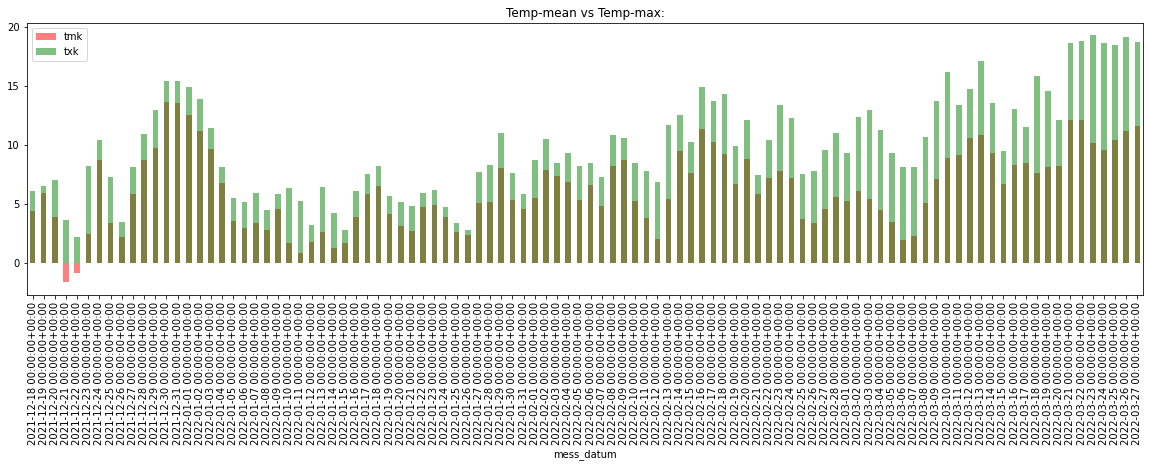

In [44]:
# plot max temp and mean temp
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 5))
plt.title(('Temp-mean vs Temp-max:'))
df['tmk'].tail(100).plot.bar(color='Red', legend=True,  alpha=0.5)
df['txk'].tail(100).plot.bar(color='green', legend=True, alpha=0.5)

plt.yticks()
plt.show()

In [45]:
df[['tmk','txk']].corr() # to justify the plot above

,tmk,txk
tmk,1.000000,0.971265
txk,0.971265,1.000000
